# Assignment - What's the Weather Like?

## Background

Whether financial, political, or social -- data's true power lies in its ability to answer questions definitively. So let's take what you've learned about Python requests, APIs, and JSON traversals to answer a fundamental question: "What's the weather like as we approach the equator?"

Now, we know what you may be thinking: _"Duh. It gets hotter..."_

But, if pressed, how would you **provide evidence**?

## WeatherPy

In this example, you'll be creating a Python script to visualize the weather of 500+ cities across the world of varying distance from the equator. To accomplish this, you'll be utilizing a [simple Python library](https://pypi.python.org/pypi/citipy), the [OpenWeatherMap API](https://openweathermap.org/api), and a little common sense to create a representative model of weather across world cities.

Your objective is to build a series of scatter plots to showcase the following relationships:

* Temperature (F) vs. Latitude
* Humidity (%) vs. Latitude
* Cloudiness (%) vs. Latitude
* Wind Speed (mph) vs. Latitude

Your final notebook must:

* Randomly select **at least** 500 unique (non-repeat) cities based on latitude and longitude.
* Perform a weather check on each of the cities using a series of successive API calls.
* OPTIONAL: Include a print log of each city as it's being processed with the city number and city name.
* OPTIONAL: Save both a CSV of all data retrieved and png images for each scatter plot.

As final considerations:

* You must complete your analysis using a Jupyter notebook.
* You must use the Matplotlib ,Seaborn or Pandas plotting libraries.
* You must include a written description of three observable trends based on the data.
* You must use proper labeling of your plots, including aspects like: Plot Titles (with date of analysis) and Axes Labels.

## Hints and Considerations

* The city data is generated based on random coordinates; as such, your outputs will not be an exact match to the provided starter notebook.

* You may want to start this assignment by refreshing yourself on the [geographic coordinate system](http://desktop.arcgis.com/en/arcmap/10.3/guide-books/map-projections/about-geographic-coordinate-systems.htm).

* Next, spend the requisite time necessary to study the OpenWeatherMap API. Based on your initial study, you should be able to answer  basic questions about the API: Where do you request the API key? Which Weather API in particular will you need? What URL endpoints does it expect? What JSON structure does it respond with? Before you write a line of code, you should be aiming to have a crystal clear understanding of your intended outcome.

* A starter code for Citipy has been provided. However, if you're craving an extra challenge, push yourself to learn how it works: [citipy Python library](https://pypi.python.org/pypi/citipy). 

* Lastly, remember -- this is a challenging activity. Push yourself! If you complete this task, then you can safely say that you've gained a strong mastery of the core foundations of data analytics and it will only go better from here. Good luck!
#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [95]:
# Don't modify this cell.
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from pprint import pprint

# Import API key
import api_keys

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [96]:
# Don't modify this cell
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

572

In [72]:
#playing to understand code:
#city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
#print(city)

yellowknife


A lot of starter code has been generated for you. Use the cell below to play with the data to ensure you know what's happening. 

### Perform API Calls
* Perform a weather check on each city in `cities` using a series of successive API calls.
* OPTIONAL: Include a print log of each city as it'sbeing processed (with the city number and city name).


In [97]:
# OpenWeatherMap API Key
api_key = api_keys.api_key

# base url for getting api data
base_url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key

# example request
req = requests.get(base_url + f'&q={cities[0]}').json()

# Your code here. A loop maybe? 
#NOTE: API calls can be slow. They can also be limited. Once you have a list try not to rerun all API calls very often.

import time

cities_dict = []
for index,city in enumerate(cities):
    req = requests.get(base_url + f'&q={cities[index]}').json()
    print(str(index) +" "+ city)
    #Sleep for 1 second so you don't get suspended. 
    time.sleep(1)
    cities_dict.append(req)

0 hermanus
1 butaritari
2 rikitea
3 trairi
4 hilo
5 mys shmidta
6 puerto ayora
7 coihaique
8 port alfred
9 hargeysa
10 wattegama
11 avera
12 punta arenas
13 jamestown
14 ostrovnoy
15 ushuaia
16 cabo san lucas
17 calbuco
18 dingle
19 aktau
20 pulandian
21 colac
22 buta
23 geraldton
24 samusu
25 hithadhoo
26 salme
27 cape town
28 ahuimanu
29 vila velha
30 governador valadares
31 lebu
32 umm kaddadah
33 east london
34 vaini
35 beloha
36 guarapari
37 tasiilaq
38 dikson
39 muroran
40 mahebourg
41 thompson
42 walvis bay
43 paramonga
44 benjamin aceval
45 torbay
46 avarua
47 hervey bay
48 bethel
49 bluff
50 tadine
51 constitucion
52 hobart
53 haines junction
54 leningradskiy
55 port elizabeth
56 tavda
57 albany
58 longyearbyen
59 sumbawa
60 cherskiy
61 taolanaro
62 prachatice
63 illoqqortoormiut
64 arraial do cabo
65 ballina
66 upernavik
67 mataura
68 yellowknife
69 sao filipe
70 namatanai
71 faanui
72 atuona
73 harbour breton
74 gurskoye
75 taltal
76 barrow
77 kahului
78 kununurra
79 busselt

### Convert Raw Data to DataFrame
* OPTIONAL: Export the city data into a .csv.
* Display the DataFrame

In [110]:
#create empty lists for data
save_longitude = []
save_latitude = []
save_temp = []
save_min = []
save_max = []
save_humidity = []
save_cloudiness = []
save_wind_speed = []
save_country = []

#create function to extract relevant data from nested dictionary
def get_city_data():
    for city_data in cities_dict:
        
        #only include successful requests
        if city_data['cod'] == 200:
            coordinates = city_data['coord']
            longitude = coordinates['lat']
            latitude = coordinates['lon']
            
            #add data to empty lists
            save_longitude.append(longitude)
            save_latitude.append(latitude)
    
            temperature = city_data['main']
            temp = temperature['temp']
            temp_min = temperature['temp_min']
            temp_max = temperature['temp_max']
            humidity = temperature['humidity']
            save_temp.append(temp)
            save_min.append(temp_min)
            save_max.append(temp_max)
            save_humidity.append(humidity)
    
            clouds = city_data['clouds']
            cloudiness = clouds['all']
            save_cloudiness.append(cloudiness)
    
            wind = city_data['wind']
            wind_speed = wind['speed']
            save_wind_speed.append(wind_speed)
    
            country = city_data['name']
            save_country.append(country)
        
get_city_data()

In [124]:
#combine individual lists into a dataframe
weather_df = pd.DataFrame()
weather_df['Country']= save_country
weather_df['Longitude']= save_longitude
weather_df['Latitude']=save_latitude
weather_df['Temperature'] = save_temp
weather_df['Temp Min'] = save_min
weather_df['Temp Max'] = save_max
weather_df['Humidity']=save_humidity
weather_df['Cloudiness']=save_cloudiness
weather_df['Wind Speed']=save_wind_speed
weather_df

,Country,Longitude,Latitude,Temperature,Temp Min,Temp Max,Humidity,Cloudiness,Wind Speed
0,Hermanus,-34.42,19.23,62.01,62.01,62.01,69,0,6.80
1,Butaritari,3.07,172.79,82.53,82.53,82.53,77,18,16.02
2,Rikitea,-23.12,-134.97,72.07,72.07,72.07,77,58,20.15
3,Trairi,-3.28,-39.27,86.25,86.25,86.25,55,41,16.64
4,Hilo,19.73,-155.09,65.59,50.00,73.40,78,90,8.05
...,...,...,...,...,...,...,...,...,...
517,Wajir,1.75,40.06,89.60,89.60,89.60,38,23,13.24
518,Ariquemes,-9.91,-63.04,90.66,90.66,90.66,50,93,4.88
519,Bereda,43.27,-7.54,70.97,68.00,73.99,55,10,5.01
520,Illapel,-31.63,-71.17,82.53,82.53,82.53,26,59,8.86


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Use matplotlib
* OPTIONAL: Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

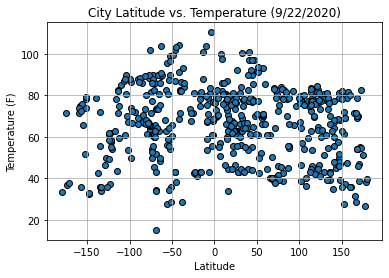

In [120]:
plt.scatter(weather_df['Latitude'], weather_df['Temperature'], edgecolor = 'black')
plt.xlabel('Latitude')
plt.ylabel('Temperature (F)')
plt.title('City Latitude vs. Temperature (9/22/2020)')
plt.grid()
plt.show()

#### Latitude vs. Humidity Plot

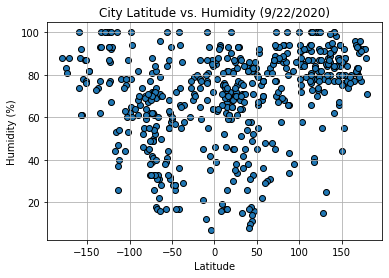

In [121]:
plt.scatter(weather_df['Latitude'], weather_df['Humidity'], edgecolor = 'black')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('City Latitude vs. Humidity (9/22/2020)')
plt.grid()
plt.show()

#### Latitude vs. Cloudiness Plot

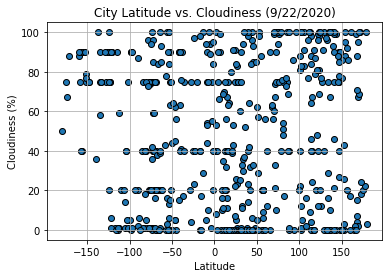

In [122]:
plt.scatter(weather_df['Latitude'], weather_df['Cloudiness'], edgecolor = 'black')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('City Latitude vs. Cloudiness (9/22/2020)')
plt.grid()
plt.show()

#### Latitude vs. Wind Speed Plot

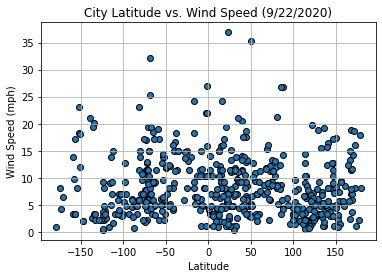

In [125]:
plt.scatter(weather_df['Latitude'], weather_df['Wind Speed'], edgecolor = 'black')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title('City Latitude vs. Wind Speed (9/22/2020)')
plt.grid()
plt.show()

### Use the Seaborn library to re-create 2-4 of the above plots. 
* Use the same data just make a different plot.
* Note the differences in amount of code required to generate a similar plot.

Text(0, 0.5, 'Temperature (F)')

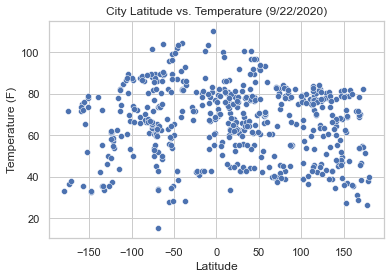

In [140]:
import seaborn as sns

sns.set_theme(style="whitegrid")
lat_v_temp = sns.scatterplot(x = 'Latitude', y = 'Temperature', data = weather_df)
lat_v_temp.set_title('City Latitude vs. Temperature (9/22/2020)')
plt.ylabel('Temperature (F)')


Text(0, 0.5, 'Humidity (%)')

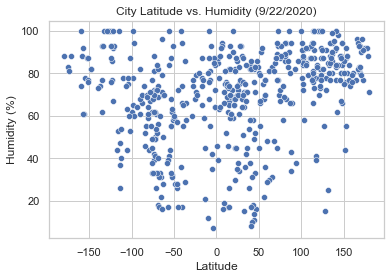

In [141]:
sns.set_theme(style="whitegrid")
lat_v_humidity = sns.scatterplot(x = 'Latitude', y = 'Humidity', data = weather_df)
lat_v_humidity.set_title('City Latitude vs. Humidity (9/22/2020)')
plt.ylabel('Humidity (%)')



### As a Data-Scientist:
In addition to generating data, munging data and plotting data you will also be responsible for *interpreting* data. 
* Provide a written description of three observable trends based on the data.

In [ ]:
#When comparing humidity and city latitude, the humidity tends to remain higher the further the latitude gets away from 0 in either direction. While cities at latitude 0 can also have humidity, humidity for cities 150 or further from latitude 0 remains above 60%.
#When comparing wind speed and latitude, most wind speed for all latitudes remains below 25 mph. The only cities with wind speeds above 25 mph are located within 80 in either direction of latitude 0. 
#When comparing latitude with cloudiness, there is no clear trend to suggest that latitude has a strong correlation with cloudiness.

### OPTIONAL Homework Problem: 
* Use a **different** api endpoint such as `Hourly Forecast 4 days` to get data. 
* Other weather api endpoints are documented [here](https://openweathermap.org/api). 
* You will have to change the URL parameters to get the data you want. 
* Get the data into a data structure of your choice. (Pandas, dicts, lists etc...)
* Use the plotting library of your choice to make 1-4 plots of your choice. 